# Strategy Testing

In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
class TradingStrategy:
    def __init__(self, ranking_df, stock_folder='data', lookahead_days=10, initial_capital=1000000, buy_n=5, sell_n=5, handling_fee_rate=0.0015):
        self.ranking_df = ranking_df
        self.stock_folder = stock_folder
        self.lookahead_days = lookahead_days
        self.initial_capital = initial_capital
        self.buy_n = buy_n
        self.sell_n = sell_n
        self.handling_fee_rate = handling_fee_rate
        self.stock_prices = self._load_stock_prices()

    def _load_stock_prices(self):
        stock_files = [f for f in os.listdir(self.stock_folder) if f != 'companies.csv']
        stock_data = {}
        for file in stock_files:
            stock = file.split('_')[0]
            file_path = os.path.join(self.stock_folder, file)
            df = pd.read_csv(file_path)
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            df[f'{self.lookahead_days}d Profit'] = (df['Close'].shift(-self.lookahead_days)-df['Close'])
            df[f'{self.lookahead_days}d Return rate'] = df[f'{self.lookahead_days}d Profit']/df['Close']
            df['Handling fee'] = df['Close']*self.handling_fee_rate + df['Close'].shift(-self.lookahead_days)*self.handling_fee_rate
            stock_data[stock] = df
        return stock_data

    def backtest(self):
        portfolio_value = [self.initial_capital]
        cum_return_rate = [0]

        for _, row in self.ranking_df.iterrows():
            date = row['Date']
            if date not in self.stock_prices['2330'].index:
                continue

            # Get the ranking of this date
            ranking_list = row['Ranking']

            # Determine the stocks to buy and sell
            top_stocks = ranking_list[:self.buy_n]
            bottom_stocks = ranking_list[-self.sell_n:]

            long_position_profit = sum(self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Profit']-self.stock_prices[stock].loc[date, 'Handling fee'] for stock in top_stocks)
            short_position_profit = sum(-self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Profit']-self.stock_prices[stock].loc[date, 'Handling fee'] for stock in bottom_stocks)

            total_profit = (long_position_profit + short_position_profit)*1000
            portfolio_value.append(portfolio_value[-1]+total_profit)

            long_position_return = sum(self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Return rate']-self.handling_fee_rate*2 for stock in top_stocks)
            short_position_return = sum(-self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Return rate']-self.handling_fee_rate*2 for stock in bottom_stocks)

            total_return = long_position_return+short_position_return
            cum_return_rate.append(cum_return_rate[-1]+total_return)

        return portfolio_value, cum_return_rate

## Strategy Backtesting

### CNN Hetero (Buy 5, Sell 5)

[1000000, 1050310.9835119247, 1048996.061396122, 1035723.2682776451, 1032838.2300333977, 1024103.0781722069, 1011875.6886601448, 1022700.7140102386, 989910.2578225136, 976808.2244610786, 1001901.4510416985, 998631.3244214058, 943937.1575398445, 1003535.7565793991, 1040981.2099981308, 1012326.7677483559, 990656.410671711, 1049624.5829672813, 1023078.7487540245, 1030158.5821995735, 1096075.1747860909, 1144616.3203296661, 1112612.5722837448, 1169397.8621435165, 1143798.679420948, 1128683.8847441673, 1172800.5776290894, 1362056.8840603828, 1367037.0131144524, 1331970.5000019073, 1296751.5398602486, 1454295.0088615417, 1453600.1061849594, 1439158.539665699, 1396897.4042601585, 1429183.8481440544, 1381200.8237085342, 1336480.7617769241, 1214021.5938344002, 1201682.7688355446, 1215732.2826418877, 1231950.0712637901, 1217429.0401682854, 1021158.7543706894, 968006.1807055473, 922280.5549426079, 943859.9303212166, 967769.7976861, 893095.6787838936, 1012997.6310715675, 966468.0079760551]
[0, 0.06

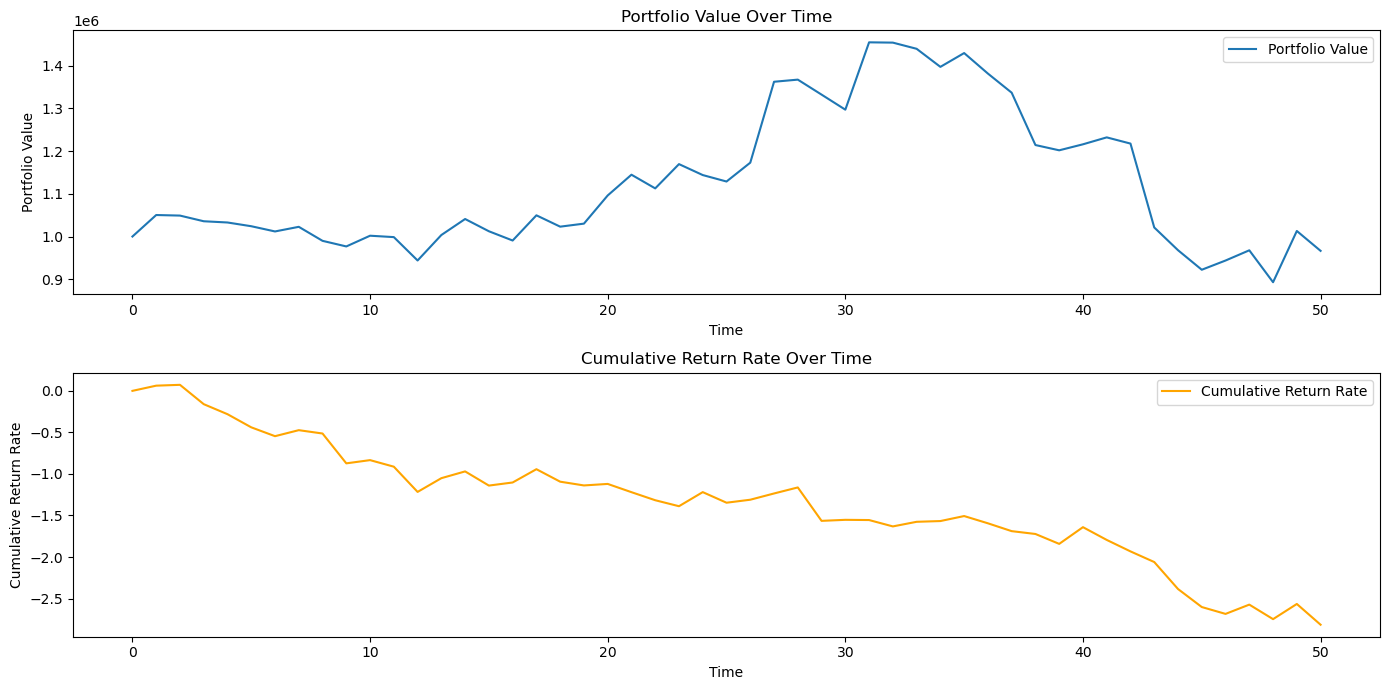

In [3]:
df = pd.read_csv('strategy_testing/CNN_Hetero_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### CNN Homo (Buy 5, Sell 5)

[1000000, 1057152.433895111, 1025720.6151556969, 1019036.9362893105, 987238.2264790535, 1192132.172653675, 1179904.783141613, 1190602.6231441498, 1168460.910852909, 1154076.7933478355, 1179170.0199284554, 1175899.8933081627, 1121205.7264266014, 1134107.7978010178, 1173307.5012197495, 1148224.1589665413, 1146799.8240833282, 1215775.9433317184, 1189441.913720131, 1202315.14868927, 1268231.7412757874, 1321363.3110575676, 1286317.9766879082, 1278287.01654768, 1251637.8838205338, 1214393.643362999, 1345325.2832007408, 1343861.0648207664, 1348841.193874836, 1346014.8484663963, 1333058.5104646683, 1490266.40914011, 1489571.5064635277, 1500907.1672296524, 1459412.0306768417, 1503137.0776205063, 1452751.6047062874, 1520189.8556981087, 1388938.6618084908, 1372701.9833827019, 1343803.0360455513, 1271162.0242877007, 1256672.018189907, 1065543.1801023483, 1029681.1117720604, 978384.6621518135, 894705.8609919548, 918177.9783568382, 844202.1590714455, 903607.7901749611, 848844.5868916512]
[0, 0.14968

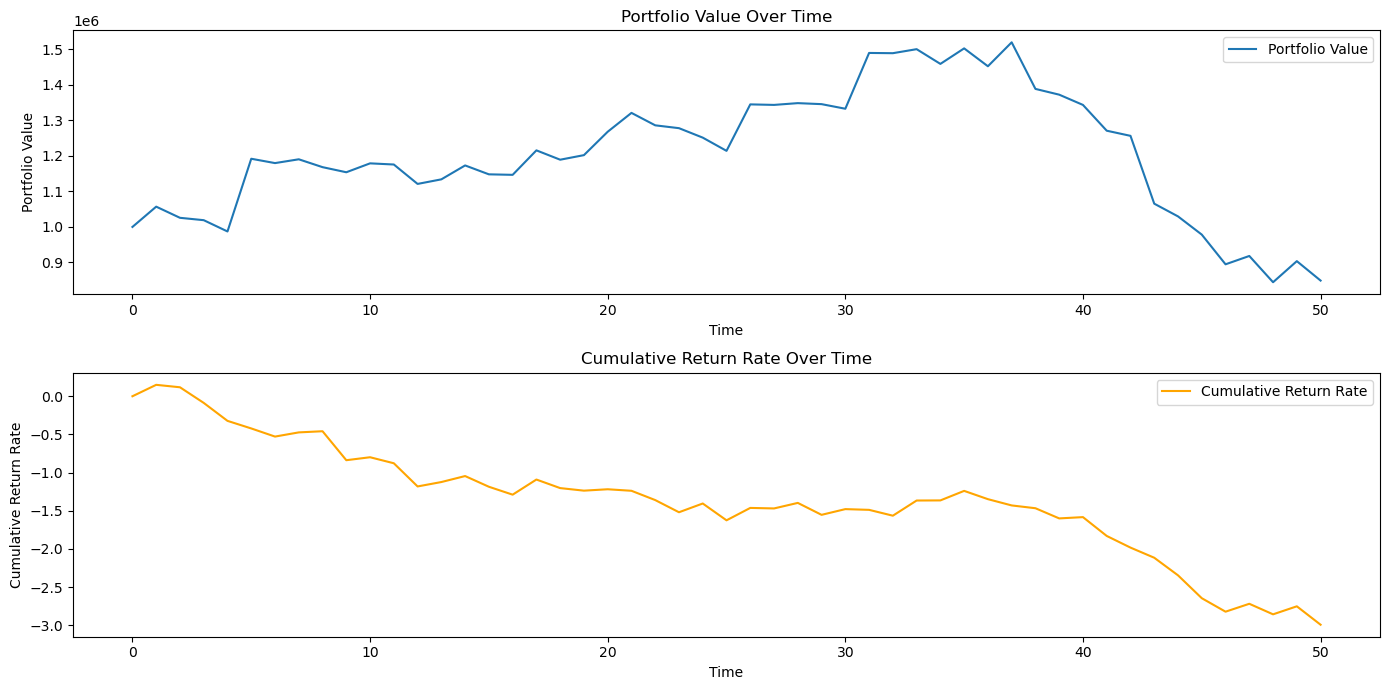

In [4]:
df = pd.read_csv('strategy_testing/CNN_Homo_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### CNN Total (Buy 5, Sell 5)

[1000000, 1050310.9835119247, 1048996.061396122, 1035704.9488921165, 1003850.786052227, 995115.6341910362, 983698.1329407692, 953278.0746078491, 920487.618420124, 909355.2937235832, 972172.9722619057, 968902.845641613, 921429.308403492, 934054.5059194565, 965769.8062887192, 936716.0417017937, 935771.4815688133, 1004747.6008172035, 978646.9709558487, 998909.3639183044, 1064825.9565048218, 1112813.401286602, 1081080.0047392845, 1073049.0445990562, 1048336.3156900406, 1033221.5210132599, 1156934.4873394966, 1165687.0189595222, 1112408.577439785, 1078815.0556230545, 1043596.0954813957, 1200803.9941568375, 1197202.0418634415, 1208445.652249813, 1139678.290316105, 1171042.0826764107, 1123059.0582408905, 1078338.9963092804, 959959.0783667564, 944115.098792553, 845063.6029801369, 648189.0912222862, 633668.0601267815, 438816.4962797165, 401649.47734737396, 355923.8515844345, 280522.1250448227, 304431.9924097061, 228804.42274570465, 348706.3750333786, 298316.35361766815]
[0, 0.06256611532656713,

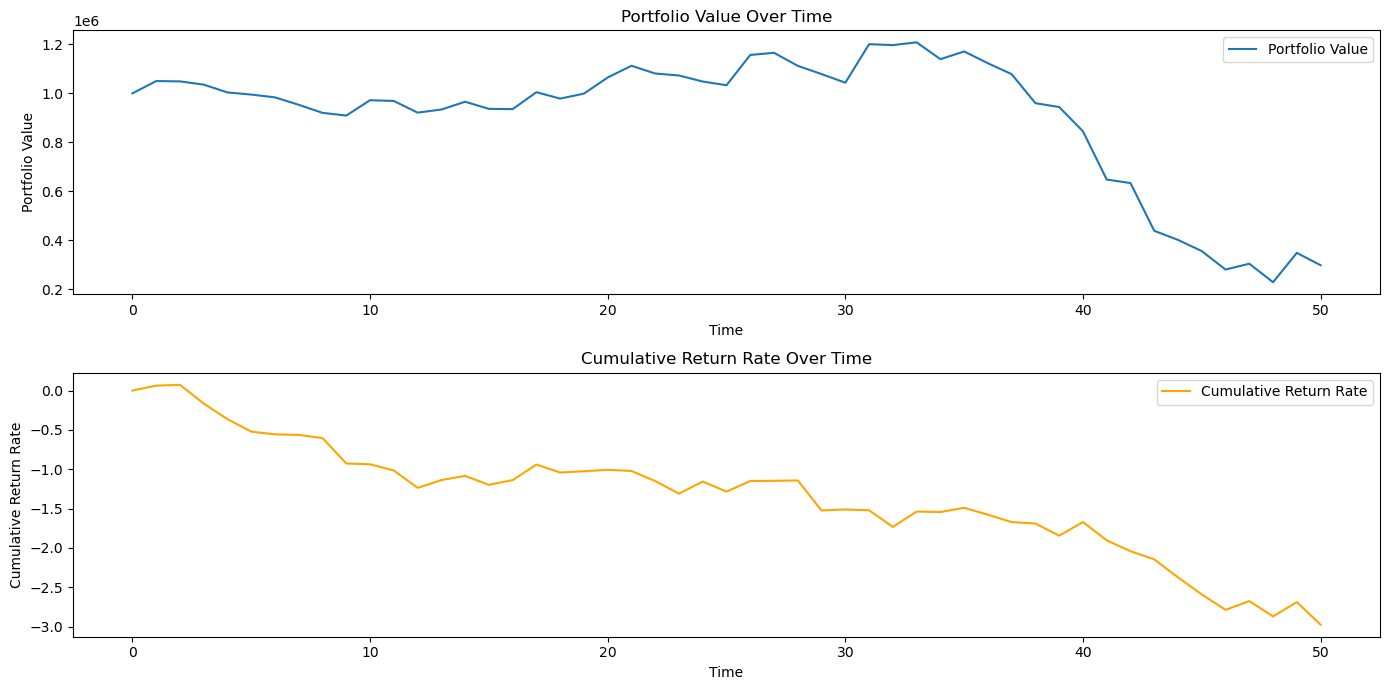

In [5]:
df = pd.read_csv('strategy_testing/CNN_Total_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### ResNet Hetero (Buy 5, Sell 5)

[1000000, 998210.5114850998, 999378.8515348434, 1095718.424771309, 1067366.270277977, 1051193.0056915283, 1047656.8576879501, 1052425.3851065636, 1060048.252120018, 1059517.6095256805, 1074365.8877091408, 1050439.2572698593, 981306.7175278664, 982651.881980896, 1025096.162314415, 1007839.8846907616, 1008803.028840065, 1050029.0211668015, 1389804.800667286, 1394848.6457948685, 1303317.5511331558, 1305529.4523105621, 1285207.940773964, 1296567.1095499992, 1273806.9798521996, 1104529.51632452, 1225470.9271793365, 1407929.5672135353, 1370792.9512162209, 1206485.625090599, 1217343.846563816, 1254722.9760847092, 1200751.346256256, 1181149.5805916786, 1211951.9328827858, 1275981.4517655373, 1269213.2273368835, 1363874.132525444, 1415387.8934073448, 1443668.2184062004, 1453549.0295462608, 1189627.5507349968, 1185265.3299546242, 937343.028439045, 909669.7369446754, 917702.7877030373, 915334.2897996902, 951027.2401828766, 904849.156785965, 901035.1306524277, 850083.0765981674]
[0, -0.09908902030

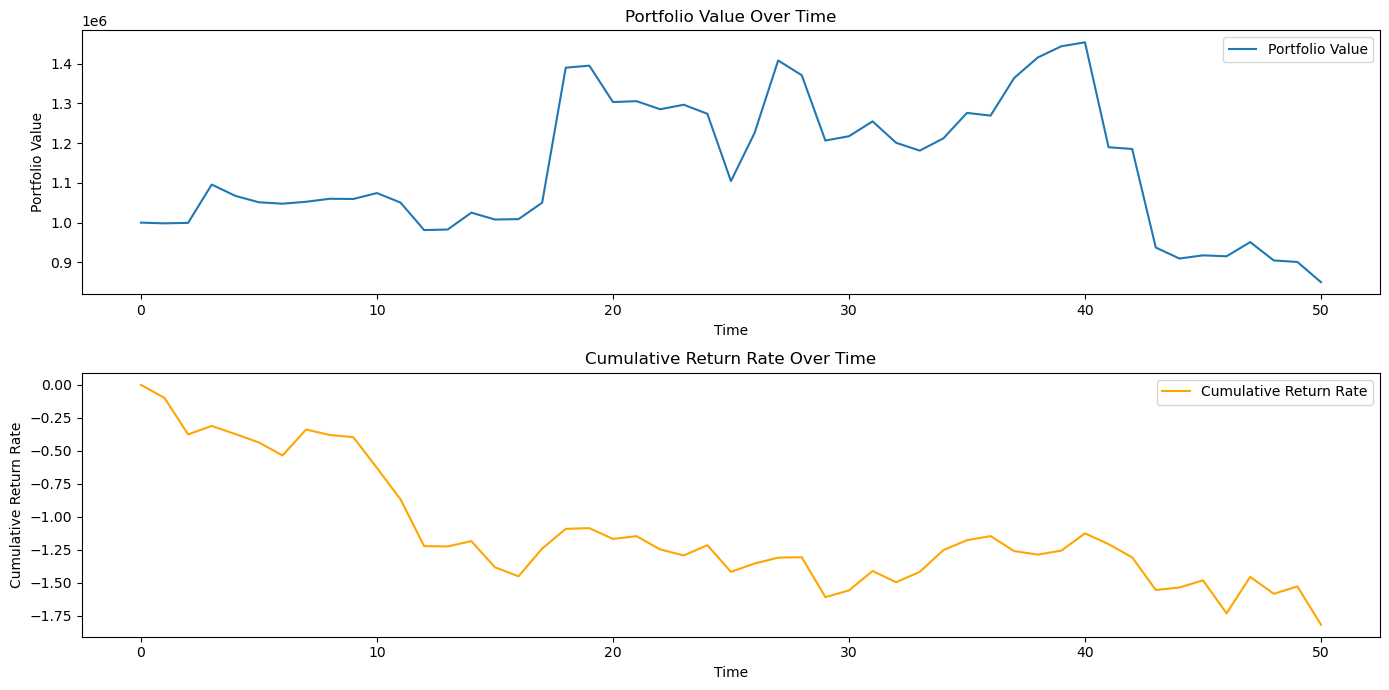

In [6]:
df = pd.read_csv('strategy_testing/ResNet_Hetero_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### ResNet Homo (Buy 5, Sell 5)

[1000000, 991591.5119142532, 1002576.1958627701, 1101138.5085749626, 1072474.7980504036, 1070900.9330735207, 1069609.5643076897, 1074759.310145855, 1085497.6512298584, 1072726.437989235, 1106769.4832606316, 1061148.4028167725, 992987.8889198303, 999276.1072421074, 1034570.9072442055, 1017314.6296205521, 993185.4257125854, 1033877.1533164978, 1377757.289261818, 1376362.3282561302, 1284831.2335944176, 1336653.667649746, 1302751.4564957619, 1299200.9144186974, 1279309.6885390282, 1118789.4750113487, 1246069.8858661652, 1428404.101574421, 1392754.7571167946, 1226645.048675537, 1233205.245151043, 1250433.682308197, 1195673.6149673462, 1187768.444345951, 1218570.7966370583, 1285073.7939639091, 1274711.4180173874, 1346148.8451519012, 1396723.6207289696, 1423965.1682491302, 1436114.7289991379, 1178639.3009519577, 1173054.9127998352, 902005.4355201721, 857332.2893314362, 861862.8389453888, 861730.7164149284, 846201.9690880775, 800023.8856911659, 792517.5395150185, 749111.3623652458]
[0, -0.0780

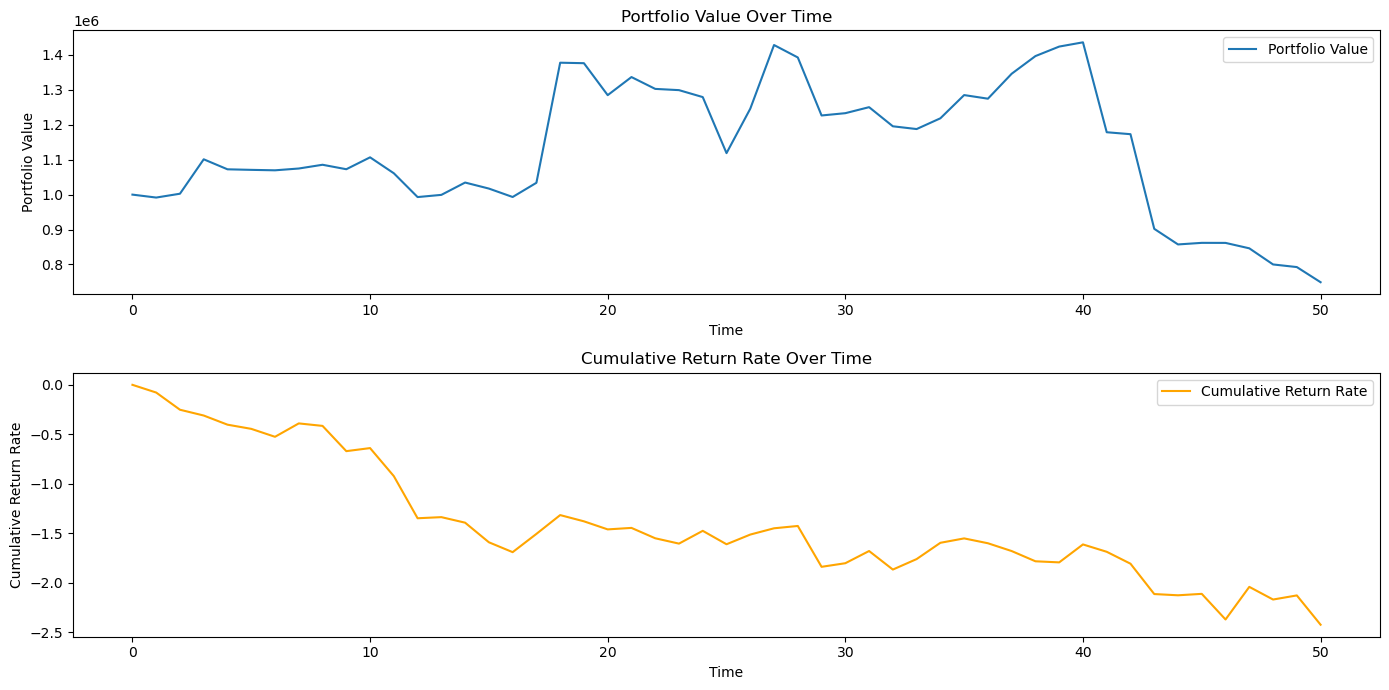

In [7]:
df = pd.read_csv('strategy_testing/ResNet_Homo_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### ResNet Total (Buy 5, Sell 5)

[1000000, 980169.2540464401, 991140.5875425339, 1036934.543422699, 1008270.83289814, 1004036.747045517, 1002745.378279686, 1004021.2407269478, 1008746.116440773, 1027237.2047328949, 1048420.9909186363, 1022723.9032125473, 953428.5438966751, 960661.1483483315, 999435.3525166512, 981686.2256593704, 983660.3174467087, 978603.5060462952, 1322483.6419916153, 1321521.2086567879, 1229990.1139950752, 1285781.4345798492, 1257321.1215162277, 1267011.5989747047, 1244332.0738568306, 1064024.1103291512, 1185187.0227098465, 1368037.3028039932, 1329814.072962761, 1141339.296075344, 1159387.51907444, 1196008.901647091, 1142102.0682330132, 1123866.647611618, 1154668.9999027252, 1223222.4864664078, 1212860.110519886, 1280456.887272358, 1155627.663230896, 1182869.2107510567, 1186732.9722628593, 919738.7434515953, 918190.6052994728, 650735.1309528351, 606061.9847640991, 610075.9109039307, 563743.9656634331, 533196.5664229393, 476082.2891306877, 470510.89333200455, 429209.8642754555]
[0, -0.174286271039948

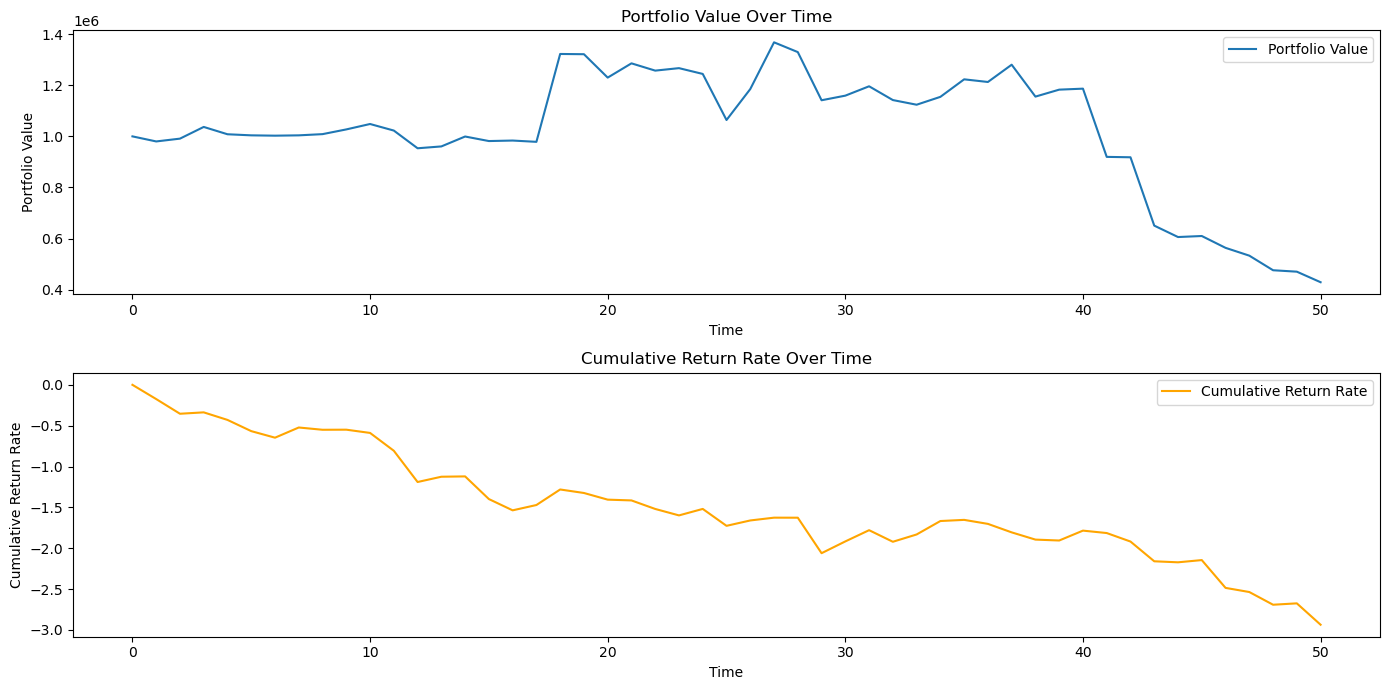

In [8]:
df = pd.read_csv('strategy_testing/ResNet_Total_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### UNet Hetero (Buy 5, Sell 5)

[1000000, 1047242.3320140839, 1059308.5094504356, 1059087.443344593, 1028392.1910881996, 1234733.4642281532, 1221417.5747160912, 1190997.516383171, 1158207.060195446, 1147074.7354989052, 1169674.432958126, 1154885.741654873, 1104217.6794190407, 1113616.3769350052, 1151946.226158142, 1123291.7839083672, 1101621.4268317223, 1158275.5521245003, 1132174.9222631454, 1145165.5318536758, 1054506.6452445984, 1102494.0900263786, 1070105.8087038994, 1057760.9327235222, 1030225.3461828232, 1014719.848449707, 1138432.8147759438, 1341154.6462049484, 1283844.4600200653, 1290129.8570246696, 1254910.8968830109, 1407857.04631567, 1403931.9936413765, 1388559.0278816223, 1346297.8924760818, 1384484.7381753922, 1336501.713739872, 1291781.6518082619, 1172703.4308185577, 1166824.7542915344, 1069578.1569509506, 895173.2207627296, 880652.1896672249, 684276.5015773773, 677672.7355046272, 624512.8585944176, 567863.3593401909, 534322.9767050743, 460347.15741968155, 585334.2619996071, 538973.0587162971]
[0, -0.02

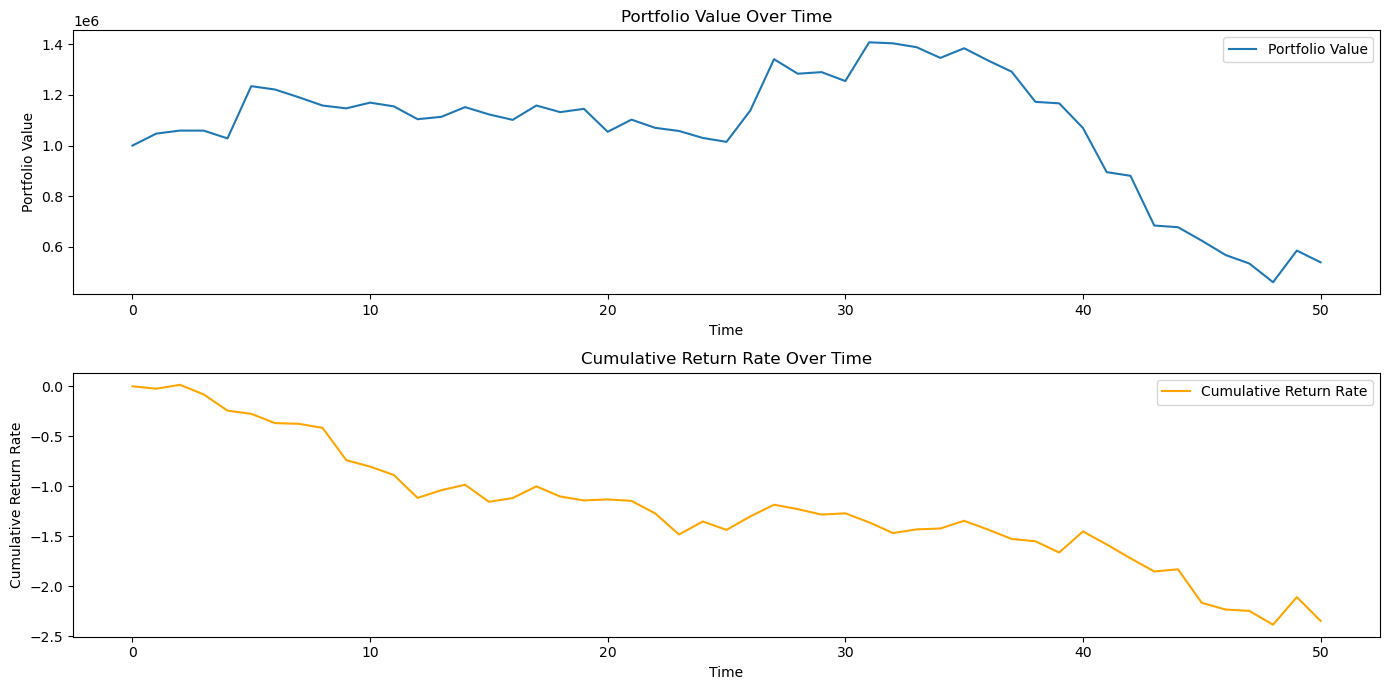

In [9]:
df = pd.read_csv('strategy_testing/UNet_Hetero_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### UNet Homo (Buy 5, Sell 5)

[1000000, 1047151.9816017151, 1018062.1744990349, 984930.9676346779, 929251.4653782845, 1142725.2661328316, 1129409.3766207695, 1140734.5718774796, 1121086.7172179222, 1107984.6838564873, 1172675.3915162086, 1157886.7002129555, 1103192.5333313942, 1117876.5293283463, 1153570.3866786957, 1115688.6459479332, 1094018.2888712883, 1151723.9222979546, 1097417.7485618591, 1110290.9835309982, 1019632.0969219208, 1068173.242465496, 1035784.9611430168, 1024003.5010027885, 1001945.0159902573, 968804.5955448151, 1097784.6102433205, 1293774.9893846512, 1298625.7676792145, 1274700.0999913216, 1239481.1398496628, 1205192.9362282753, 1201267.8835539818, 1212511.4939403534, 1170157.328959465, 1198455.9936466217, 1148238.019206524, 1098881.6818928719, 976160.0624313354, 990435.460524559, 897236.8412380219, 805862.2802419662, 787707.0506677628, 591331.3625779152, 553382.8415813446, 500099.34157562256, 429475.2146539688, 394643.5320177078, 319969.4131155014, 419825.9176931381, 359802.717461586]
[0, -0.002

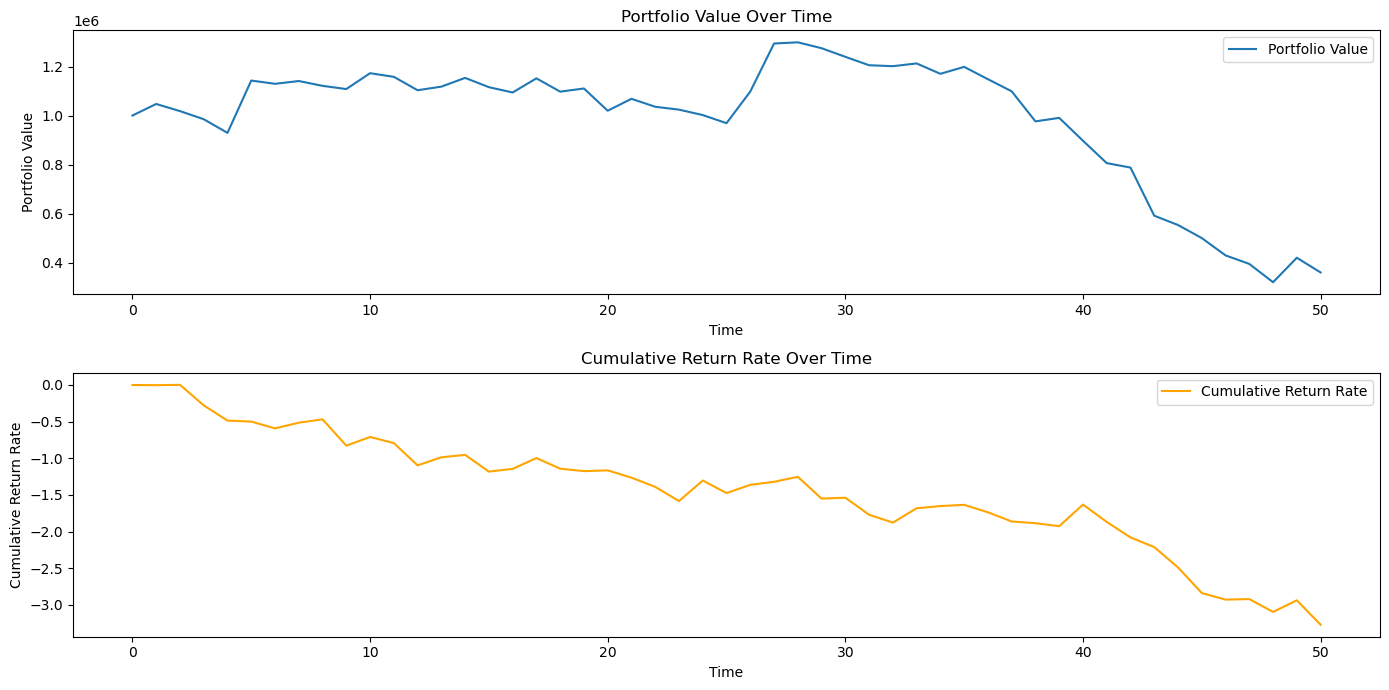

In [10]:
df = pd.read_csv('strategy_testing/UNet_Homo_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### UNet Total (Buy 5, Sell 5)

[1000000, 1047600.7595062256, 1017046.3013186455, 1003806.0229792595, 972394.8211026192, 1185868.6218571663, 1173641.2323451042, 1187437.4240121841, 1154646.967824459, 1143514.6431279182, 1206332.3216662407, 1203062.195045948, 1150793.428162098, 1165477.42415905, 1199930.6245260239, 1170876.8599390984, 1149206.5028624535, 1206845.928156376, 1150564.048295021, 1163437.2832641602, 1101548.0462741852, 1155501.4034285545, 1118658.03982687, 1106876.5796866417, 1079340.9931459427, 1045141.2757568359, 1168854.2420830727, 1361359.3235120773, 1308080.88199234, 1314769.1158280373, 1279550.1556863785, 1432496.3051190376, 1394158.4484677315, 1401582.381948471, 1359228.2169675827, 1399752.793870926, 1350572.7946224213, 1304916.7073087692, 1186934.237844944, 1191388.5575089455, 1098189.9382224083, 923153.6764645576, 904998.4468903542, 710146.8830432892, 686896.7616658211, 639184.0855174065, 559803.5866475105, 580531.1570687294, 535664.1627879143, 655566.1150755882, 595934.264316082]
[0, -0.013025315

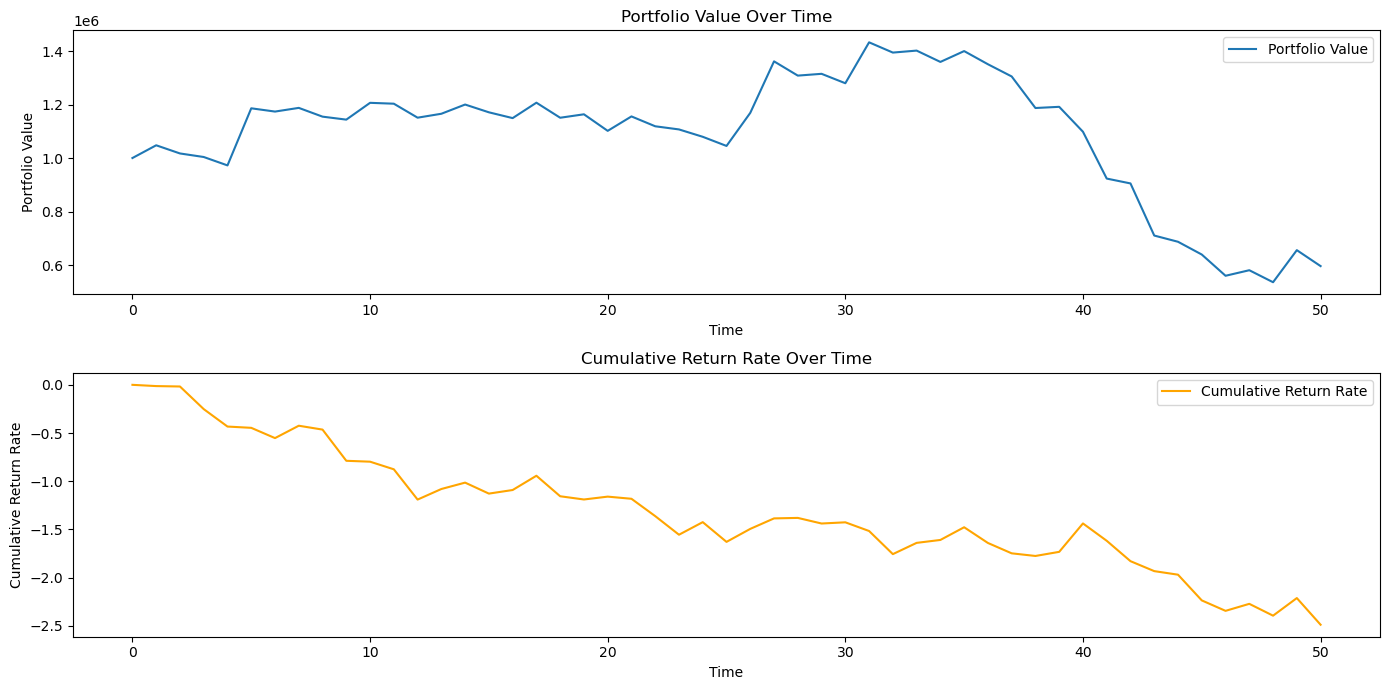

In [11]:
df = pd.read_csv('strategy_testing/UNet_Total_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### VGGNet Hetero (Buy 5, Sell 5)

[1000000, 1048325.7374277115, 1060391.9148640633, 1060170.8487582207, 1028931.3465018272, 1028776.049220562, 1016548.6597084999, 1027726.2691297531, 1008078.4144701958, 994953.30001688, 1057770.9785552025, 1054666.084025383, 1005873.6671438217, 1067531.0646643639, 1108562.1154065132, 1079508.3508195877, 1054044.7201805115, 1165017.9970026016, 1140236.0643129349, 1159354.4504270554, 1224432.9888191223, 1272267.2824559212, 1239879.001133442, 1229270.7667527199, 1204501.0870819092, 1187332.1719827652, 1311045.138309002, 1316252.7674503326, 1318641.8942213058, 1281664.532632351, 1259636.0415811539, 1412836.4955983162, 1411611.5402531624, 1419035.473733902, 1379794.007610321, 1419936.4253492355, 1368165.8743901253, 1441291.5734763145, 1318896.927491188, 1347259.0717754364, 1254060.4524888992, 1270278.2411108017, 1251647.9926424026, 1050558.404554844, 1043052.3835582733, 997326.7577953339, 912819.387362957, 936729.2547278404, 862055.135825634, 977625.838113308, 925570.1621165276]
[0, -0.0175

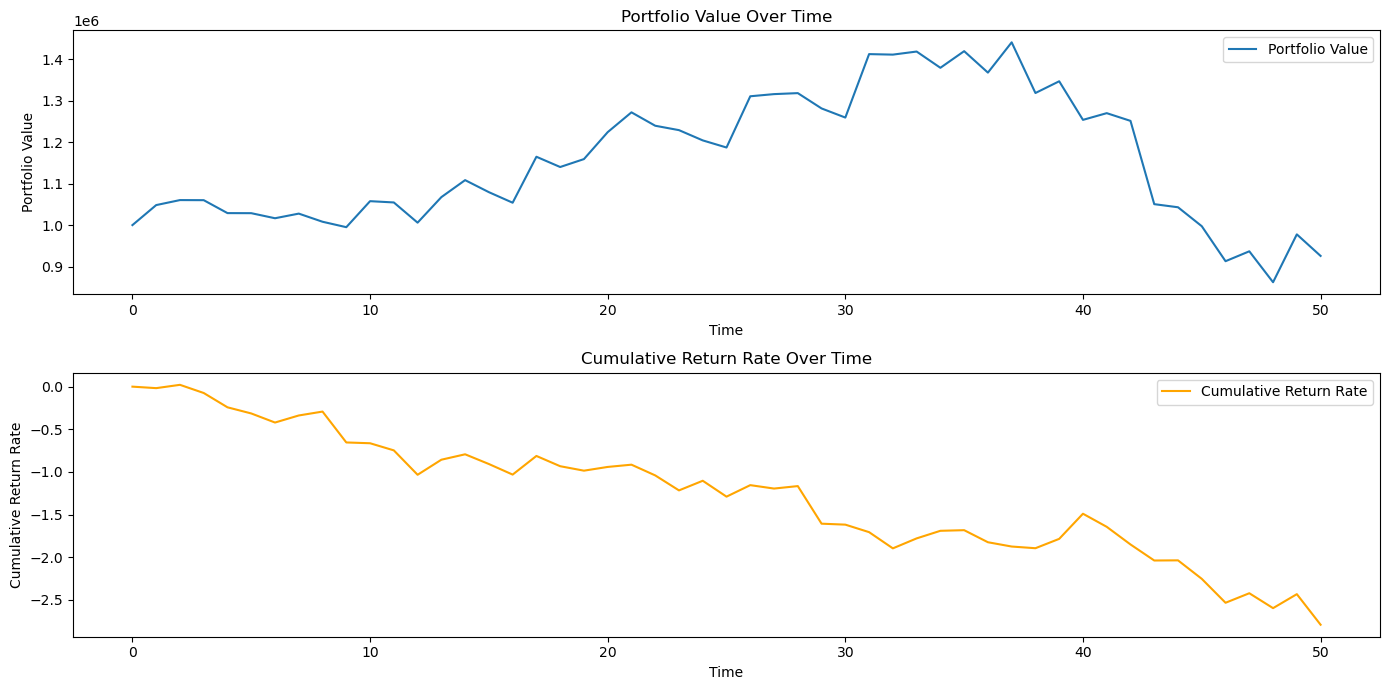

In [12]:
df = pd.read_csv('strategy_testing/VGGNet_Hetero_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### VGGNet Homo (Buy 5, Sell 5)

[1000000, 981151.1884527206, 949719.3697133064, 922255.9298110008, 891560.6775546074, 891405.3802733421, 879177.9907612801, 889875.8307638168, 867734.1184725761, 854609.0040192604, 872396.0196805, 869125.8930602074, 820333.4761786461, 662201.2975530624, 702285.3967761993, 676802.7321858406, 655132.3751091957, 724108.4943575859, 697562.6601443291, 710621.1451134682, 776537.7376999855, 829666.794090271, 791781.1445207596, 785019.3359041214, 751786.2001252174, 732520.4350352287, 849780.6430082321, 1050965.7746305466, 1055945.903684616, 1021471.7453365326, 1031259.4073348045, 1188802.8763360977, 1184877.8236618042, 1173416.5851874352, 1131062.4202065468, 1172868.3675322533, 1125690.9438676834, 1192193.1694774628, 1074055.8742518425, 1068036.894677639, 1152223.582722187, 1084934.8713440895, 1070413.8402485847, 875562.2764015198, 869503.3544521332, 823777.7286891937, 747326.3321232796, 771236.199488163, 695608.6298241615, 817384.6851658821, 762899.2576432228]
[0, -0.06919622810515262, -0.101

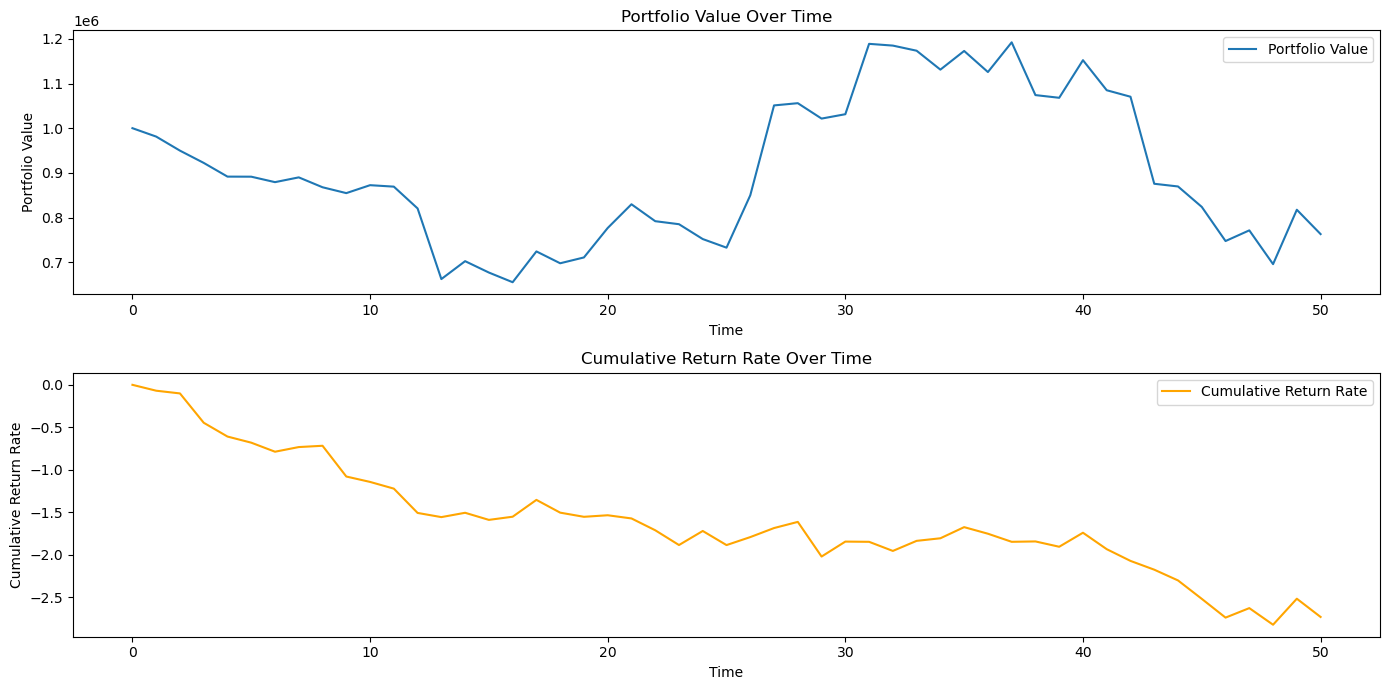

In [13]:
df = pd.read_csv('strategy_testing/VGGNet_Homo_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### VGGNet Total (Buy 5, Sell 5)

[1000000, 1057803.7374277115, 1026371.9186882973, 1013131.6403489113, 957452.1380925179, 1174190.0184292793, 1154399.230445385, 1154195.6882295609, 1121803.48072958, 1072087.6679434776, 1129010.4268612862, 1125740.3002409935, 1071046.1333594322, 1085730.1293563843, 1121252.731631279, 1092598.289381504, 1068306.8794937134, 1125946.3047876358, 1099845.674926281, 1118964.0610404015, 1212812.249051571, 1260799.6938333511, 1228411.412510872, 1220380.4523706436, 1196185.522699833, 1163435.8053107262, 1280618.7111625671, 1275609.5903038979, 1222331.1487841606, 1218948.6916599274, 1189628.1315159798, 1342828.585533142, 1341603.6301879883, 1349027.5636687279, 1310645.1259732246, 1347707.9967684746, 1295937.4458093643, 1253396.7933673859, 1125320.8218069077, 1124197.8914709091, 1146698.9267597198, 937517.8894276619, 919362.6598534584, 728233.8217658997, 704322.8998165131, 649957.8475208282, 570577.3486509323, 596180.7644968033, 520553.1948328018, 604760.2274599075, 553139.0272283554]
[0, 0.00867

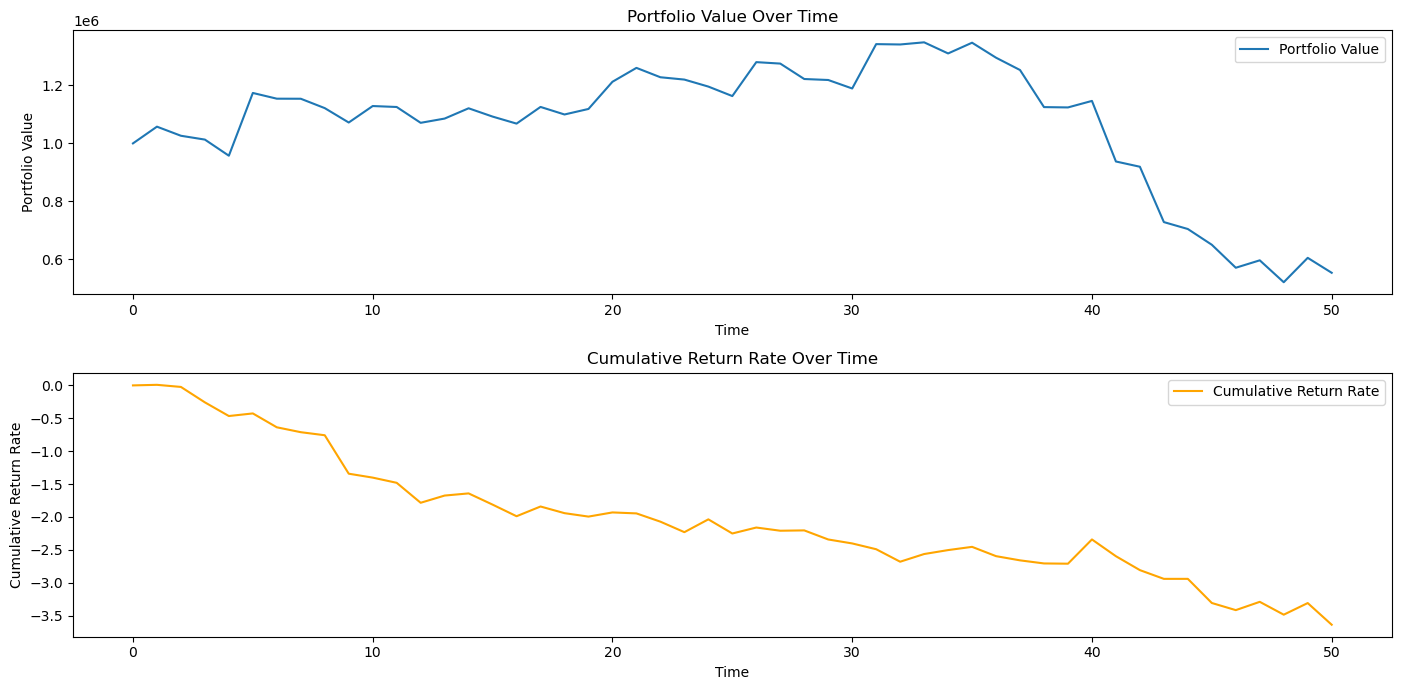

In [14]:
df = pd.read_csv('strategy_testing/VGGNet_Total_rank_testing.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()